<a href="https://colab.research.google.com/github/Frank0012/BiasMachine/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from pylab import *
from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import train_test_split

In [187]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


For this data set, in order to simplify, I will only be using data entries of the 'Current Smoking' MeasureDesc and 'Cigarette Use(Adults)' TopicDesc. This describes people who have reported smoking at least 100 cigarettes and who currently smoke every day or on some days.This is a form of data cleaning which could introduce bias. For example, it neglects people who could have smoked more than 100 cigarettes but who have quitted recently. They could still be at risk from smoking related diseases, and thus make some medical predictions based on this data set less reliable.

In [188]:
data = []
for i in range(len(df['YEAR'])):
  if (df['MeasureDesc'][i] == 'Current Smoking'):
    data.append([df['YEAR'][i], df['LocationDesc'][i], df['Gender'][i], df['Race'][i], df['Age'][i], df['Education'][i], df['Data_Value'][i]])

In [189]:
data

[[2011,
  'Alabama',
  'Overall',
  'All Races',
  '65 Years and Older',
  'All Grades',
  10.2],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  'Age 25 and Older',
  '> 12th Grade',
  17.5],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  'Age 20 and Older',
  '> 12th Grade',
  17.7],
 [2011,
  'Alabama',
  'Overall',
  'African American',
  'All Ages',
  'All Grades',
  20.7],
 [2011, 'Alabama', 'Female', 'All Races', 'All Ages', 'All Grades', 21.0],
 [2011, 'Alabama', 'Overall', 'All Races', 'All Ages', 'All Grades', 24.3],
 [2011,
  'Alabama',
  'Female',
  'All Races',
  '18 to 44 Years',
  'All Grades',
  24.3],
 [2011, 'Alabama', 'Overall', 'White', 'All Ages', 'All Grades', 24.9],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  'Age 25 and Older',
  '12th Grade',
  24.9],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  'Age 20 and Older',
  '12th Grade',
  26.0],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  '45 to 64 Years',
  'All Grades',
  26.2],
 [2011, '

In [190]:
years = []
for i in data:
    if int(i[0]) not in years:
      years.append(int(i[0]))


print(years)


[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [191]:
ethnicities = []
for i in data:
  if i[0] == '2018':
    if i[3] not in ethnicities:
      ethnicities.append(i[3])

print(ethnicities)


['All Races', 'White', 'Hispanic', 'American Indian/Alaska Native', 'Asian/Pacific Islander', 'African American']


In [192]:
'''
ethnic_data = []
for p in years:
  lis = []
  for i in data:
    if p in i:
      lis.append([i[6], i[3]])
  ethnic_data.append(lis)

ethnic_data
'''


'\nethnic_data = []\nfor p in years:\n  lis = []\n  for i in data:\n    if p in i:\n      lis.append([i[6], i[3]])\n  ethnic_data.append(lis)\n\nethnic_data\n'

Percentage of smokers by race

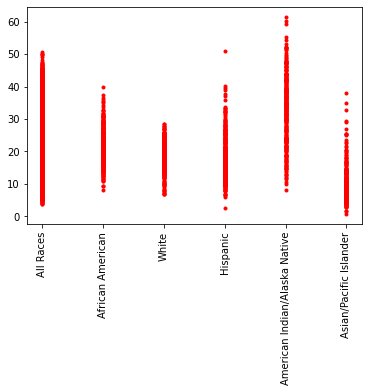

In [193]:
all_races = []
all_values = []
for i in data:
  all_races.append(i[3])
  all_values.append(i[6])
plot(all_races, all_values, 'r.')
xticks(rotation=90) 
 
show()
  

Percentage of smokers by year

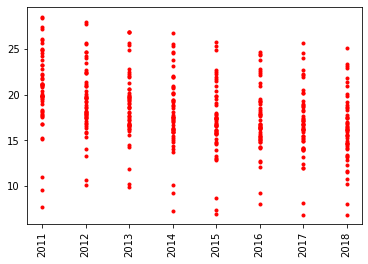

In [194]:
all_years = []
all_values = []
for i in data:
  if 'White' in i:
    all_years.append(i[0])
    all_values.append(i[6])
plot(all_years, all_values, 'r.')
xticks(rotation=90) 
 
show()

**THE ACTUAL LINEAR REGRESSION PART: PREDICTING FUTURE SMOKING PERCENTAGES BY RACE**

Plotting the average smoker percentage per year of each race by calculating mean

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[-0.60247449]]
[1233.93545857]
[[17.53947056]]


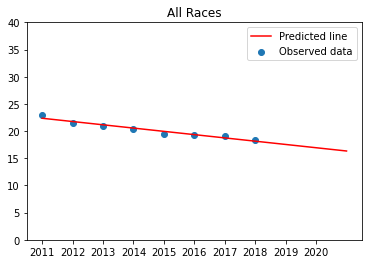

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[-0.58967425]]
[1206.01881339]
[[15.46650042]]


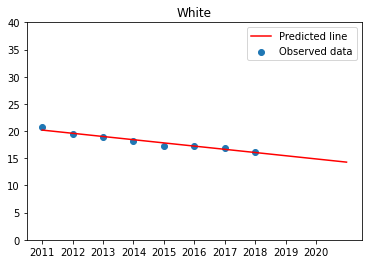

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[-0.80170309]]
[1632.4303701]
[[13.7918222]]


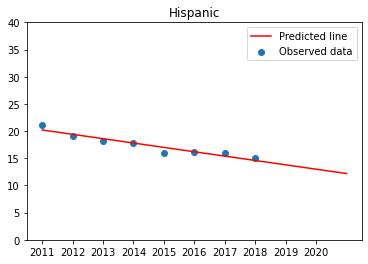

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[-0.58818944]]
[1217.71253354]
[[30.1580629]]


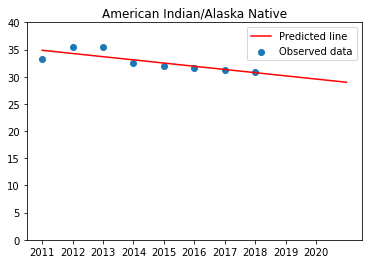

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[-0.2995434]]
[613.85276925]
[[9.07463777]]


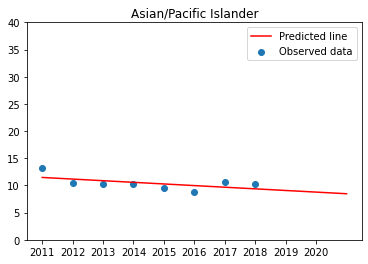

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[-0.85014687]]
[1734.15207607]
[[17.70554925]]


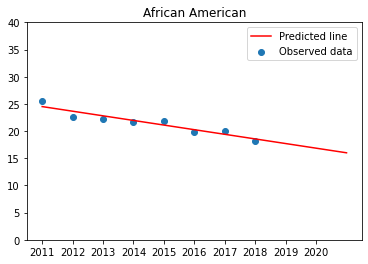

In [195]:

for e in ethnicities:
  averages = []
  for y in years:
    total = 0
    counter = 0
    for i in data:
      if y in i:
        if e in i:
          total += i[6]
          counter += 1
    averages.append(total/counter)
  #fig, ax = plt.subplots()
  #plt.title(e)
  #ylim(0, 40)
  #plot(years, averages, 'r.')
  #show()
  model = LinearRegression() 
  print(model.fit(np.array(years).reshape(-1,1), np.array(averages).reshape(-1, 1)))
  print(model.coef_)
  print(model.intercept_)
  print(model.predict(np.array((2019)).reshape(-1, 1)))
  
  x_test = np.linspace(2011,2021)
  y_pred = model.predict(x_test[:,None])
  plt.title(e)
  ylim(0, 40)
  plt.xticks(np.arange(min(years), max(years)+3, 1.0))
  plt.scatter(years,averages)
  plt.plot(x_test,y_pred,'r')
  plt.legend(['Predicted line','Observed data'])
  plt.show()
  
